In [293]:
import pandas as pd
import datetime
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
import statsmodels.api as sm  # Building and summarizing regression models
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
import matplotlib.pyplot as plt
import seaborn as sns # Advanced data visualizations

In [294]:
# read prepared data
df_umsatz = pd.read_csv("../0_DataPreparation/Data/model_train_20130701_20180731.csv", parse_dates=['Datum'])
df_umsatz

,id,Datum,Umsatz,KielerWoche,weekend_or_holiday,wetter_sonnig,wetter_wolken,wetter_regen,wetter_schnee,wetter_gewitter,...,Monat_December,Monat_February,Monat_January,Monat_July,Monat_June,Monat_March,Monat_May,Monat_November,Monat_October,Monat_September
0,1307011,2013-07-01,148.828353,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1307021,2013-07-02,159.793757,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1307031,2013-07-03,111.885594,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1307041,2013-07-04,168.864941,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1307051,2013-07-05,171.280754,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329,1712216,2017-12-21,87.471228,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9330,1712226,2017-12-22,71.911652,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9331,1712236,2017-12-23,84.062223,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
9332,1712246,2017-12-24,60.981969,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [295]:
df_umsatz.isna().any()

id                        False
Datum                     False
Umsatz                    False
KielerWoche               False
weekend_or_holiday        False
wetter_sonnig             False
wetter_wolken             False
wetter_regen              False
wetter_schnee             False
wetter_gewitter           False
wetter_dunst              False
wetter_nebel              False
temp_bin_Kalt             False
temp_bin_Moderat          False
temp_bin_Warm             False
is_silvester              False
Warengruppe_Broetchen     False
Warengruppe_Brot          False
Warengruppe_Croissant     False
Warengruppe_Konditorei    False
Warengruppe_Kuchen        False
Warengruppe_Saisonbrot    False
temp_bin_Kalt.1           False
temp_bin_Moderat.1        False
temp_bin_Warm.1           False
Monat_April               False
Monat_August              False
Monat_December            False
Monat_February            False
Monat_January             False
Monat_July                False
Monat_Ju

In [296]:
# select features
#features = ["wetter_sonnig", "wetter_wolken", "wetter_regen", "wetter_schnee", "wetter_gewitter", "wetter_dunst", "wetter_nebel","weekend_or_holiday", "KielerWoche",	"is_silvester", "temp_bin_Kalt", "temp_bin_Moderat", "temp_bin_Warm", "Warengruppe_Broetchen", "Warengruppe_Brot", "Warengruppe_Croissant", "Warengruppe_Konditorei", "Warengruppe_Kuchen", "Warengruppe_Saisonbrot"]
features = [i for i in df_umsatz.columns if i not in ["id","Datum","Umsatz"]]
X = df_umsatz[features]
Y = df_umsatz["Umsatz"]

# Scale the feature data to standardize the range
scalar = StandardScaler()

# apply standardization of features to umsatz dataframe
standardized_features = pd.DataFrame(scalar.fit_transform(df_umsatz[features].copy()), columns = features)
old_shape = df_umsatz.shape
# drop the unnormalized features from the dataframe
df_umsatz.drop(features, axis = 1, inplace = True)
# join back the normalized features
df_umsatz = pd.concat([df_umsatz, standardized_features], axis= 1)
df_umsatz

,id,Datum,Umsatz,KielerWoche,weekend_or_holiday,wetter_sonnig,wetter_wolken,wetter_regen,wetter_schnee,wetter_gewitter,...,Monat_December,Monat_February,Monat_January,Monat_July,Monat_June,Monat_March,Monat_May,Monat_November,Monat_October,Monat_September
0,1307011,2013-07-01,148.828353,-0.156448,-0.650115,-0.512225,1.974775,-0.849041,-0.17094,-0.137825,...,-0.312825,-0.285834,-0.296871,3.053723,-0.294515,-0.297512,-0.292577,-0.323847,-0.301335,-0.294944
1,1307021,2013-07-02,159.793757,-0.156448,-0.650115,-0.512225,1.974775,-0.849041,-0.17094,-0.137825,...,-0.312825,-0.285834,-0.296871,3.053723,-0.294515,-0.297512,-0.292577,-0.323847,-0.301335,-0.294944
2,1307031,2013-07-03,111.885594,-0.156448,-0.650115,-0.512225,-0.506387,1.177800,-0.17094,-0.137825,...,-0.312825,-0.285834,-0.296871,3.053723,-0.294515,-0.297512,-0.292577,-0.323847,-0.301335,-0.294944
3,1307041,2013-07-04,168.864941,-0.156448,-0.650115,-0.512225,1.974775,-0.849041,-0.17094,-0.137825,...,-0.312825,-0.285834,-0.296871,3.053723,-0.294515,-0.297512,-0.292577,-0.323847,-0.301335,-0.294944
4,1307051,2013-07-05,171.280754,-0.156448,-0.650115,-0.512225,1.974775,-0.849041,-0.17094,-0.137825,...,-0.312825,-0.285834,-0.296871,3.053723,-0.294515,-0.297512,-0.292577,-0.323847,-0.301335,-0.294944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329,1712216,2017-12-21,87.471228,-0.156448,-0.650115,-0.512225,1.974775,-0.849041,-0.17094,-0.137825,...,3.196678,-0.285834,-0.296871,-0.327469,-0.294515,-0.297512,-0.292577,-0.323847,-0.301335,-0.294944
9330,1712226,2017-12-22,71.911652,-0.156448,-0.650115,-0.512225,-0.506387,-0.849041,-0.17094,-0.137825,...,3.196678,-0.285834,-0.296871,-0.327469,-0.294515,-0.297512,-0.292577,-0.323847,-0.301335,-0.294944
9331,1712236,2017-12-23,84.062223,-0.156448,1.538190,-0.512225,-0.506387,1.177800,-0.17094,-0.137825,...,3.196678,-0.285834,-0.296871,-0.327469,-0.294515,-0.297512,-0.292577,-0.323847,-0.301335,-0.294944
9332,1712246,2017-12-24,60.981969,-0.156448,1.538190,-0.512225,-0.506387,1.177800,-0.17094,-0.137825,...,3.196678,-0.285834,-0.296871,-0.327469,-0.294515,-0.297512,-0.292577,-0.323847,-0.301335,-0.294944


In [297]:
# Convert the 'Datum' column to datetime
df_umsatz['Datum'] = pd.to_datetime(df_umsatz['Datum'])

# Split the DataFrame into two based on the specified date ranges
df_umsatz_train = df_umsatz[df_umsatz['Datum'] <= '2017-07-31']
df_umsatz_test = df_umsatz[(df_umsatz['Datum'] > '2017-07-31') & (df_umsatz['Datum'] <= '2018-07-31')]
df_umsatz_test = df_umsatz_test.reset_index(drop=True)
df_umsatz_train

,id,Datum,Umsatz,KielerWoche,weekend_or_holiday,wetter_sonnig,wetter_wolken,wetter_regen,wetter_schnee,wetter_gewitter,...,Monat_December,Monat_February,Monat_January,Monat_July,Monat_June,Monat_March,Monat_May,Monat_November,Monat_October,Monat_September
0,1307011,2013-07-01,148.828353,-0.156448,-0.650115,-0.512225,1.974775,-0.849041,-0.17094,-0.137825,...,-0.312825,-0.285834,-0.296871,3.053723,-0.294515,-0.297512,-0.292577,-0.323847,-0.301335,-0.294944
1,1307021,2013-07-02,159.793757,-0.156448,-0.650115,-0.512225,1.974775,-0.849041,-0.17094,-0.137825,...,-0.312825,-0.285834,-0.296871,3.053723,-0.294515,-0.297512,-0.292577,-0.323847,-0.301335,-0.294944
2,1307031,2013-07-03,111.885594,-0.156448,-0.650115,-0.512225,-0.506387,1.177800,-0.17094,-0.137825,...,-0.312825,-0.285834,-0.296871,3.053723,-0.294515,-0.297512,-0.292577,-0.323847,-0.301335,-0.294944
3,1307041,2013-07-04,168.864941,-0.156448,-0.650115,-0.512225,1.974775,-0.849041,-0.17094,-0.137825,...,-0.312825,-0.285834,-0.296871,3.053723,-0.294515,-0.297512,-0.292577,-0.323847,-0.301335,-0.294944
4,1307051,2013-07-05,171.280754,-0.156448,-0.650115,-0.512225,1.974775,-0.849041,-0.17094,-0.137825,...,-0.312825,-0.285834,-0.296871,3.053723,-0.294515,-0.297512,-0.292577,-0.323847,-0.301335,-0.294944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9273,1612226,2016-12-22,54.322960,-0.156448,-0.650115,-0.512225,-0.506387,1.177800,-0.17094,-0.137825,...,3.196678,-0.285834,-0.296871,-0.327469,-0.294515,-0.297512,-0.292577,-0.323847,-0.301335,-0.294944
9274,1612236,2016-12-23,133.499200,-0.156448,-0.650115,-0.512225,-0.506387,-0.849041,-0.17094,-0.137825,...,3.196678,-0.285834,-0.296871,-0.327469,-0.294515,-0.297512,-0.292577,-0.323847,-0.301335,-0.294944
9275,1612246,2016-12-24,39.577538,-0.156448,1.538190,-0.512225,-0.506387,-0.849041,-0.17094,7.255596,...,3.196678,-0.285834,-0.296871,-0.327469,-0.294515,-0.297512,-0.292577,-0.323847,-0.301335,-0.294944
9276,1612276,2016-12-27,48.890718,-0.156448,-0.650115,1.952265,-0.506387,-0.849041,-0.17094,-0.137825,...,3.196678,-0.285834,-0.296871,-0.327469,-0.294515,-0.297512,-0.292577,-0.323847,-0.301335,-0.294944


In [298]:
# Add a constant term to the training data for the regression intercept
X_train = sm.add_constant(df_umsatz_train[features])

# Train the linear regression model using Statsmodels
model = sm.OLS(df_umsatz_train["Umsatz"], X_train).fit()

# Print the summary of the regression model
# Includes metrics like R-squared, coefficients, and p-values for each feature
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     844.8
Date:                Thu, 02 Jan 2025   Prob (F-statistic):               0.00
Time:                        20:05:00   Log-Likelihood:                -42715.
No. Observations:                7493   AIC:                         8.549e+04
Df Residuals:                    7464   BIC:                         8.569e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    209

In [299]:
# Make predictions on the test set
X_test = sm.add_constant(df_umsatz_test[features])  # Add constant to test set for predictions
predictions = model.predict(X_test)
print("Predictions for test data:", predictions)

Predictions for test data: 0       190.254272
1       188.941772
2       185.801147
3       185.919312
4       244.957397
           ...    
1836     50.213257
1837     57.502319
1838    103.588257
1839    103.588257
1840     50.220549
Length: 1841, dtype: float64


In [300]:
# Calculate Mean Absolute Percentage Error (MAPE) for error evaluation
mape = (abs((df_umsatz_test["Umsatz"] - predictions) / df_umsatz_test["Umsatz"]).mean()) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 33.12%


/tmp/ipykernel_1866/3071136976.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], [df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], 'k--', color="red")


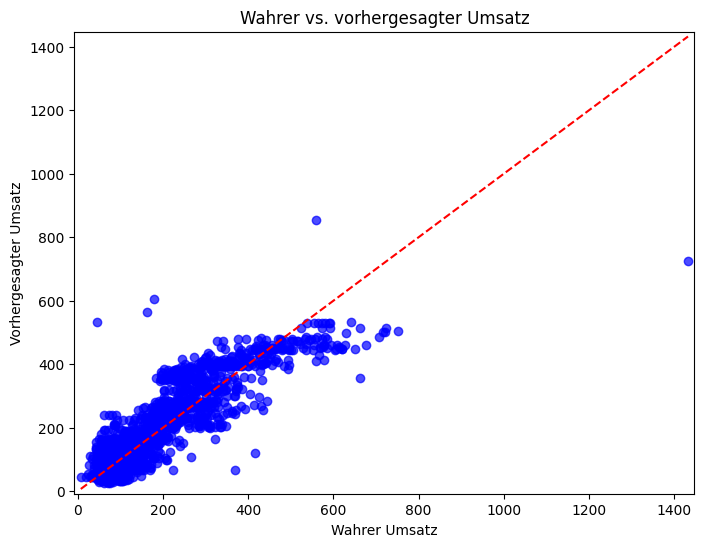

In [301]:
# Scatter plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(df_umsatz_test.Umsatz, predictions, alpha=0.7, color="blue")
plt.plot([df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], [df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], 'k--', color="red")

plt.xlim([df_umsatz_test.Umsatz.min()-15, df_umsatz_test.Umsatz.max()+15])
plt.ylim([df_umsatz_test.Umsatz.min()-15, df_umsatz_test.Umsatz.max()+15])

plt.xlabel("Wahrer Umsatz")
plt.ylabel("Vorhergesagter Umsatz")
plt.title("Wahrer vs. vorhergesagter Umsatz")
plt.show()

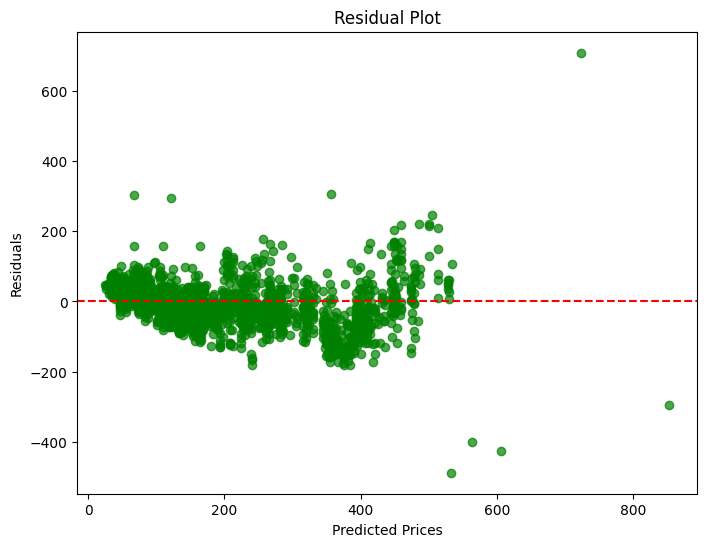

In [302]:
# Calculate residuals (differences between actual and predicted values)
residuals = df_umsatz_test["Umsatz"] - predictions

# Residual plot: Predicted Prices vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

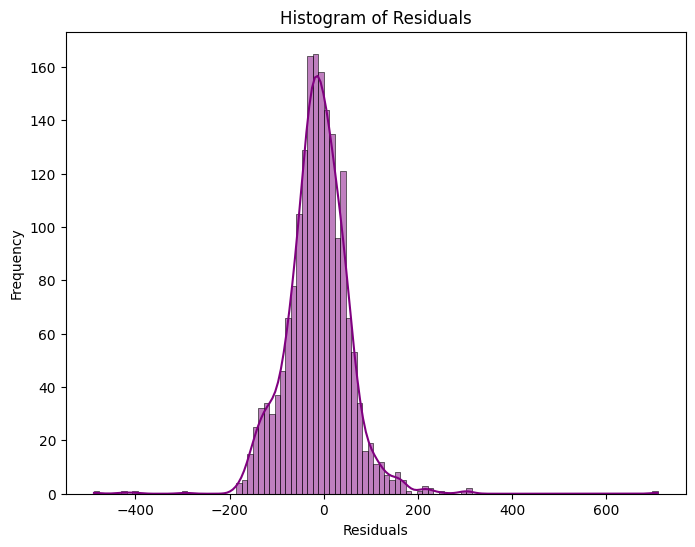

In [303]:
# Histogram of residuals to check normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

/tmp/ipykernel_1866/206816024.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")


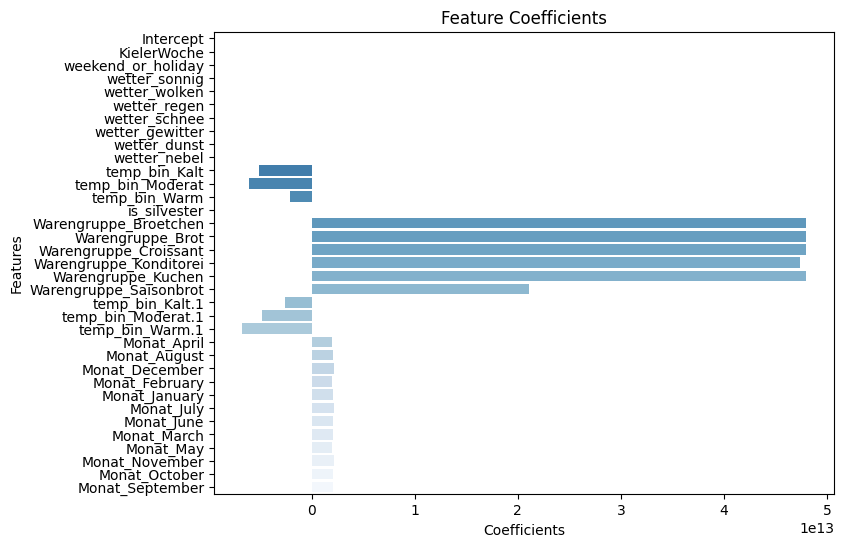

In [304]:
# Create a DataFrame of model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': model.params
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")
plt.title("Feature Coefficients")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()

***Experimenting with different Models***

In [305]:
# Import necessary libraries
import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split, GridSearchCV  # Train-test split and hyperparameter tuning
from sklearn.linear_model import Ridge  # Ridge Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics)

In [306]:
# Initialize Ridge Regression model
ridge = Ridge()

# Define hyperparameter grid for alpha (regularization strength)
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Testing a range of regularization strengths
}

# Create a GridSearchCV object for hyperparameter tuning
# - cv=5: 5-fold cross-validation
# - scoring='neg_mean_absolute_error': Metric for selecting the best model (negative MAE)
# - verbose=1: Display progress during grid search
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Train Ridge Regression model using GridSearchCV
grid_search.fit(X_train, df_umsatz_test["Umsatz"])

# Output the best hyperparameters from the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [7493, 1841]

In [ ]:
# Calculate error metrics
mae = mean_absolute_error(df_umsatz_test["Umsatz"], predictions)  # Mean Absolute Error
mse = mean_squared_error(df_umsatz_test["Umsatz"], predictions)  # Mean Squared Error
mape = (abs((df_umsatz_test["Umsatz"] - predictions) / df_umsatz_test["Umsatz"]).mean()) * 100  # Mean Absolute Percentage Error

# Output evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%"